# VGG

In [21]:
import numpy as np
from PIL import Image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

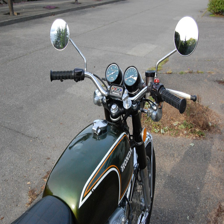

In [22]:
new_image = Image.open("C:/Users/97155/Downloads/The-Deep-Learning-with-Keras-Workshop-master/The-Deep-Learning-with-Keras-Workshop-master/Chapter08/Data/Prediction/test_image_1.jpg")
new_image =new_image.resize((224,224))
new_image

In [23]:
new_image=np.array(new_image)
new_image=np.expand_dims(new_image,axis=0)
new_image.shape

(1, 224, 224, 3)

In [24]:
new_image = preprocess_input(new_image)
new_image.shape

(1, 224, 224, 3)

In [25]:
model =VGG16()

In [31]:
Y_pred = model.predict(new_image)

1/1 [==============================] - 0s 353ms/step


In [32]:
Y_pred.shape

(1, 1000)

In [33]:
y_perd = decode_predictions(Y_pred)

In [34]:
y_perd

[[('n03785016', 'moped', 0.69319755),
  ('n03791053', 'motor_scooter', 0.29830265),
  ('n03127747', 'crash_helmet', 0.0023774032),
  ('n03208938', 'disk_brake', 0.0014602013),
  ('n04482393', 'tricycle', 0.0010314266)]]

In [35]:
prediction = y_perd[0][0]
print("%s (%2.f%%)"%(prediction[1],prediction[2]*100))

moped (69%)


# ResNet50

In [3]:
import numpy as np 
from keras.applications.resnet import ResNet50, decode_predictions,preprocess_input
from PIL import Image

In [2]:
classifier = ResNet50()
classifier.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

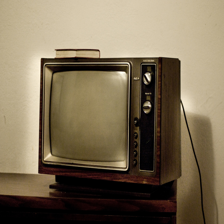

In [6]:
new_image =Image.open("C:/Users/97155/Downloads/The-Deep-Learning-with-Keras-Workshop-master/The-Deep-Learning-with-Keras-Workshop-master/Chapter08/Data/Prediction/test_image_4.jpg")
new_image = new_image.resize((224,224))
new_image

In [7]:
new_image=np.array(new_image)
new_image=np.expand_dims(new_image,axis=0)

In [8]:
new_image =preprocess_input(new_image)

In [9]:
y_pred = classifier.predict(new_image)

1/1 [==============================] - 1s 1s/step


In [11]:
label= decode_predictions(y_pred)
label

[[('n04404412', 'television', 0.99920887),
  ('n04152593', 'screen', 0.00032338477),
  ('n03782006', 'monitor', 0.0002392161),
  ('n04372370', 'switch', 0.00016443402),
  ('n03290653', 'entertainment_center', 2.4118784e-05)]]

In [24]:
prediction = label[0][0]

print("%s (%.2f%%)"% (prediction[1],prediction[2]*100))

television (99.92%)
